In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from datetime import datetime as dt

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rcParams['axes.unicode_minus'] = False
sns.set(rc=rc)

# **키워드 검색량을 이용한 수요와 전체 거래 시각 및 예매율 분석**

##### 키워드 검색량 데이터 전처리

In [17]:
keyword_df = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/키워드사운드_예술의전당 콘서트홀_검색량.csv",encoding = 'euc-kr')
df = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/클래식_빈좌석포함데이터.csv", low_memory = False)

In [18]:
keyword_df['날짜'] = pd.to_datetime(keyword_df['날짜'])

for col in ['PC 검색량','모바일 검색량','총 검색량']:
    
    keyword_df[col] = keyword_df[col].astype(int)

In [20]:
keyword_df['연도'] = keyword_df['날짜'].dt.year
keyword_df['월']  = keyword_df['날짜'].dt.month
keyword_df['일'] = keyword_df['날짜'].dt.day
keyword_df['연도_월'] = pd.to_datetime(keyword_df['연도'].astype(str) + '-' + keyword_df['월'].astype(str))

In [21]:
display(keyword_df.info())
display(keyword_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       2813 non-null   datetime64[ns]
 1   키워드      2813 non-null   object        
 2   PC 검색량   2813 non-null   int32         
 3   모바일 검색량  2813 non-null   int32         
 4   총 검색량    2813 non-null   int32         
 5   연도       2813 non-null   int64         
 6   월        2813 non-null   int64         
 7   일        2813 non-null   int64         
 8   연도_월     2813 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(3), int64(3), object(1)
memory usage: 164.9+ KB


None

,날짜,키워드,PC 검색량,모바일 검색량,총 검색량,연도,월,일,연도_월
0,2016-01-01,예술의전당 콘서트홀,10,30,40,2016,1,1,2016-01-01
1,2016-01-02,예술의전당 콘서트홀,30,40,70,2016,1,2,2016-01-01
2,2016-01-03,예술의전당 콘서트홀,30,30,60,2016,1,3,2016-01-01


# **키워드 검색량과 티켓 예매 행위의 추세 분석**

In [191]:
class DateVisualization:
    
    def __init__(self, date, df):
        
        self.date = date 
        self.df = df 
                
        self.df['play_date'] = pd.to_datetime(self.df['play_date'])
        self.df['연도'] = self.df['play_date'].dt.year
        self.df['월'] = self.df['play_date'].dt.month
        self.df['일'] = self.df['play_date'].dt.day
        self.df['연도_월'] = pd.to_datetime(self.df['연도'].astype(str) + '-' + self.df['월'].astype(str))
        
    def simpleplot_keyword_plot(self, keyword = None):
        
        
        if keyword is None:
            fig,ax = plt.subplots(figsize = (20,5))
            
            keyword = '날짜'
            
            sns.lineplot(
                data = self.date,
                x = keyword,
                y = '총 검색량',
                ax = ax
            )

            ax.set_title('날짜 별 총 검색량 추이')
            
        else:
            
            fig,ax = plt.subplots(figsize = (20,5))
            
            self.graph_df = pd.DataFrame()
            
            grouping_mean = pd.DataFrame(self.date.groupby(keyword).agg({'총 검색량':np.mean}).reset_index())
            
            self.graph_df[keyword] = grouping_mean[keyword]
            self.graph_df[f'{keyword} 별 평균 검색량'] = grouping_mean['총 검색량']
            
            if self.graph_df[keyword].nunique() < 100:
                marker = 'o'
            else:
                marker = None
                
            sns.lineplot(
                data = self.graph_df,
                x = keyword,
                y = f'{keyword} 별 평균 검색량',
                marker = marker,
                ax = ax
            )
            
            ax.set_title(f'{keyword} 별 평균 검색량')
            
            
    def simpleplot_purchase_plot(self, keyword = None):
        
        self.graph_purchase_df = pd.DataFrame()
        fig,ax = plt.subplots(figsize = (20,5))
        if keyword is None:
            keyword = 'play_date'
            
        total_좌석수 = self.df.groupby(keyword).size().values
        total_예매 = self.df.groupby(keyword).agg({'예매여부':np.sum})['예매여부'].values
        
        self.graph_purchase_df[keyword] = self.df.groupby(keyword).size().index
        self.graph_purchase_df[f'{keyword} 별 평균 예매율'] = total_예매 / total_좌석수
        
        
        if self.graph_purchase_df[keyword].nunique() < 100:
            marker = 'o'
        else:
            marker = None
        sns.lineplot(
            data = self.graph_purchase_df,
            x = keyword,
            y = f'{keyword} 별 평균 예매율',
            marker = marker,
            ax = ax
        )
        
        ax.set_title(f'{keyword} 별 평균 예매율')

In [192]:
ex = DateVisualization(keyword_df,df)

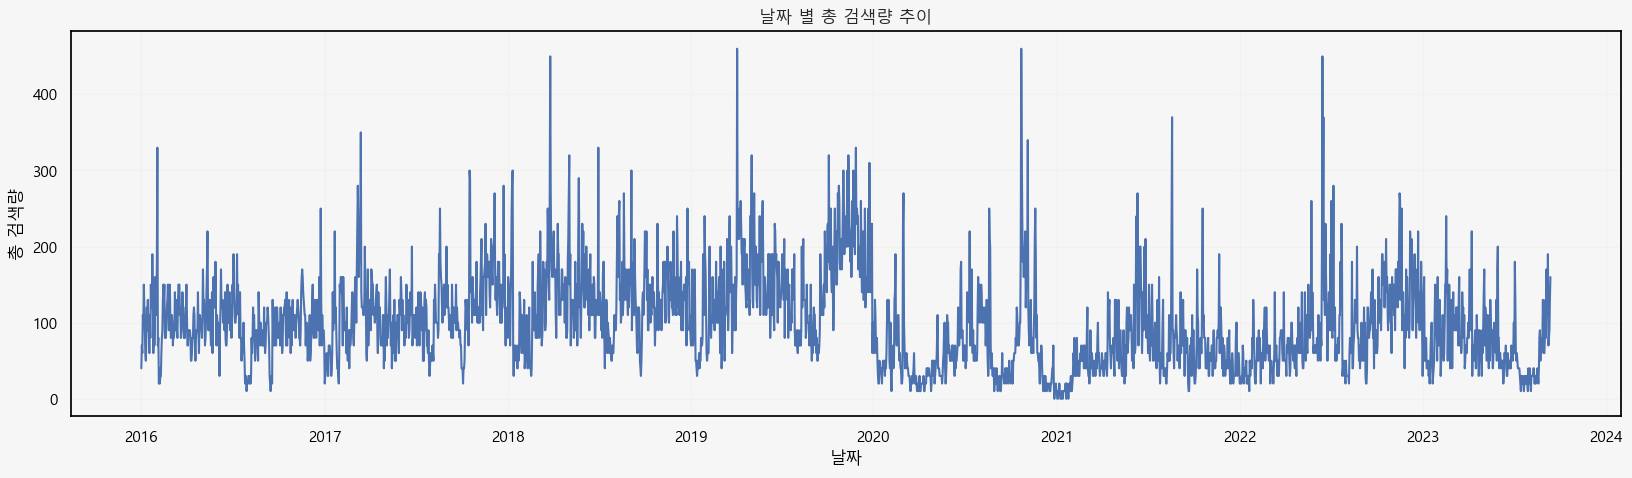

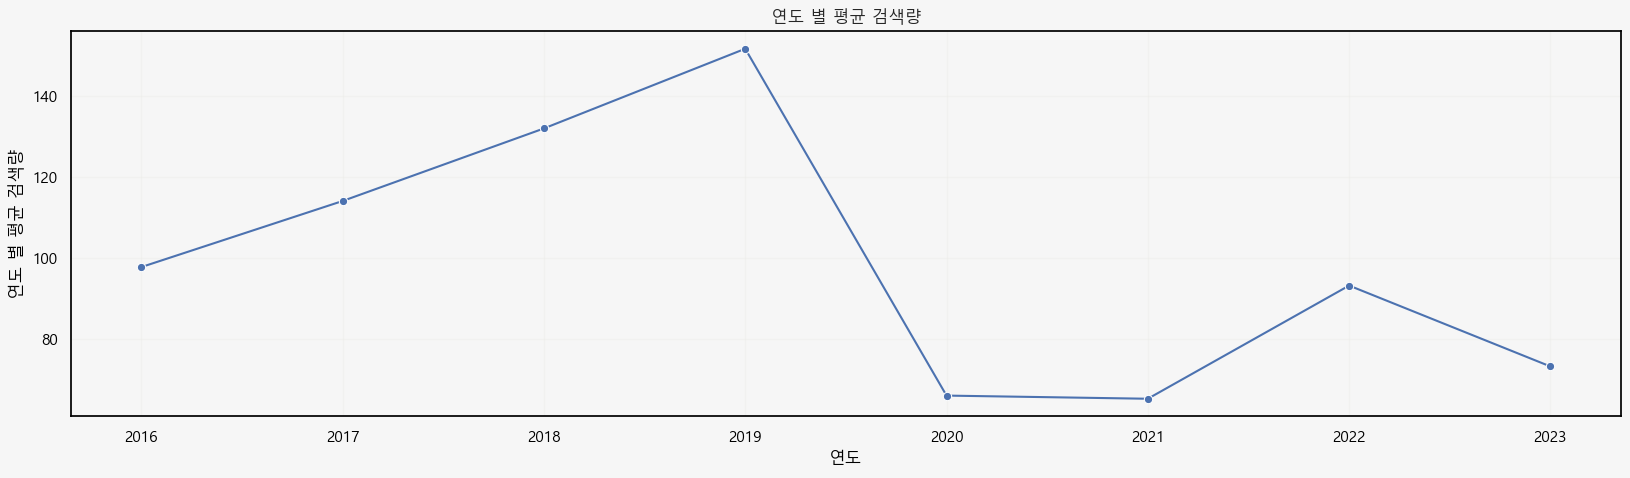

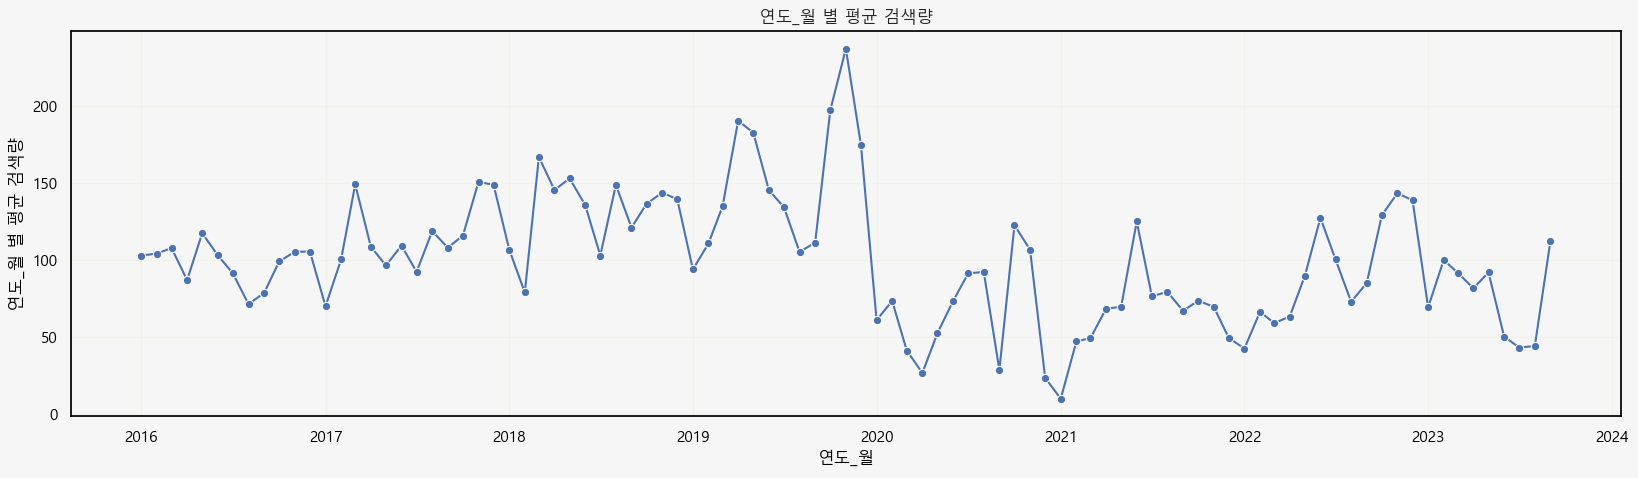

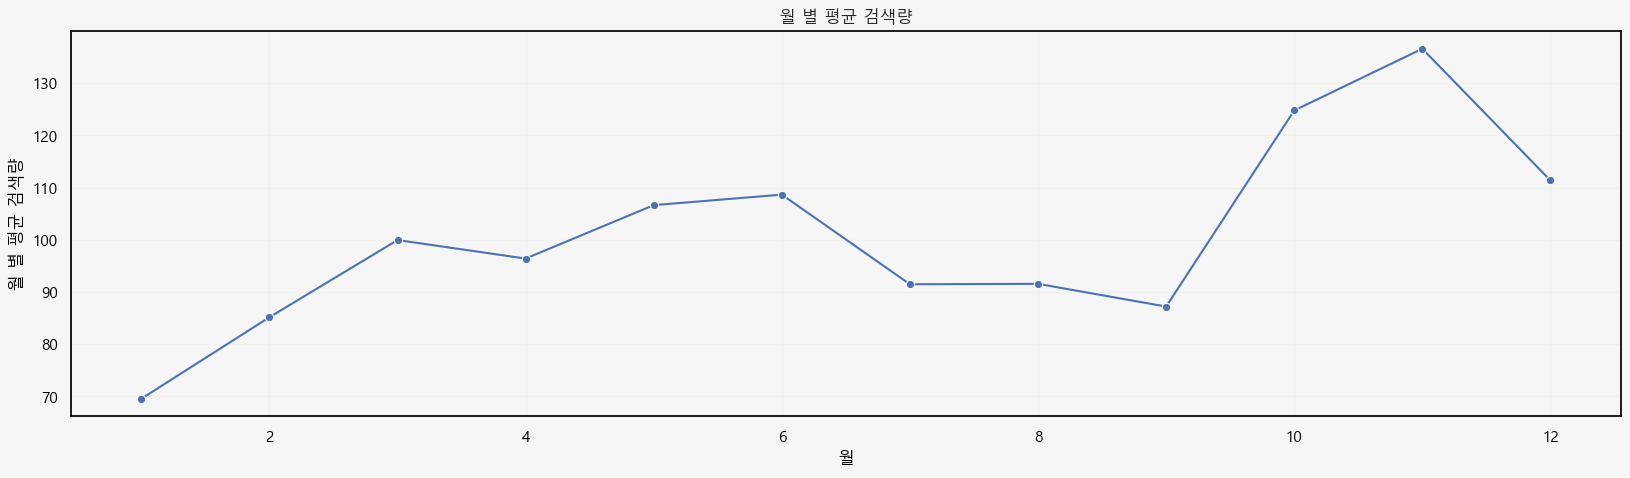

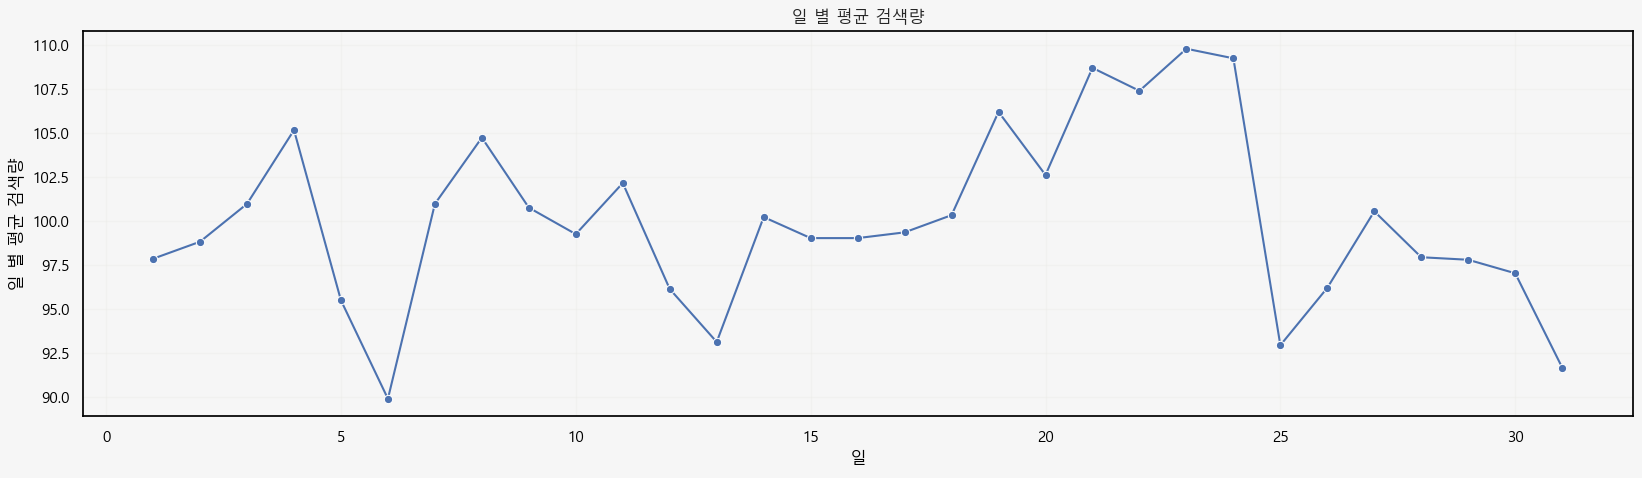

In [193]:
ex.simpleplot_keyword_plot()
ex.simpleplot_keyword_plot(keyword = '연도')
ex.simpleplot_keyword_plot(keyword = '연도_월')
ex.simpleplot_keyword_plot(keyword = '월')
ex.simpleplot_keyword_plot(keyword = '일')

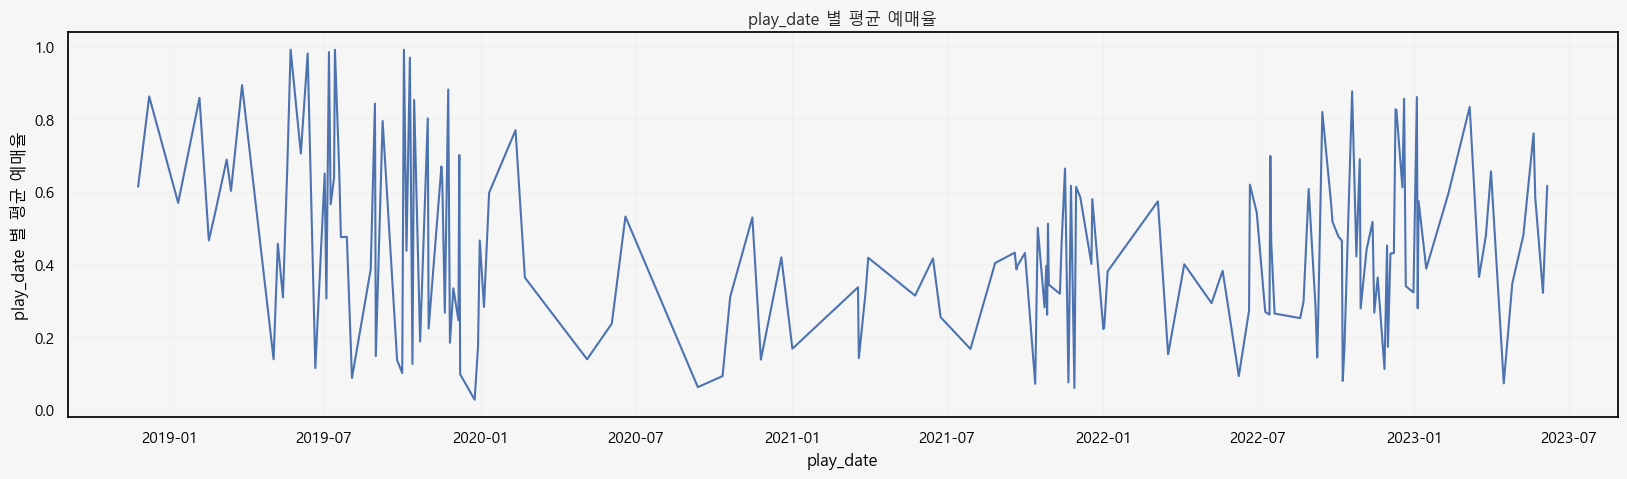

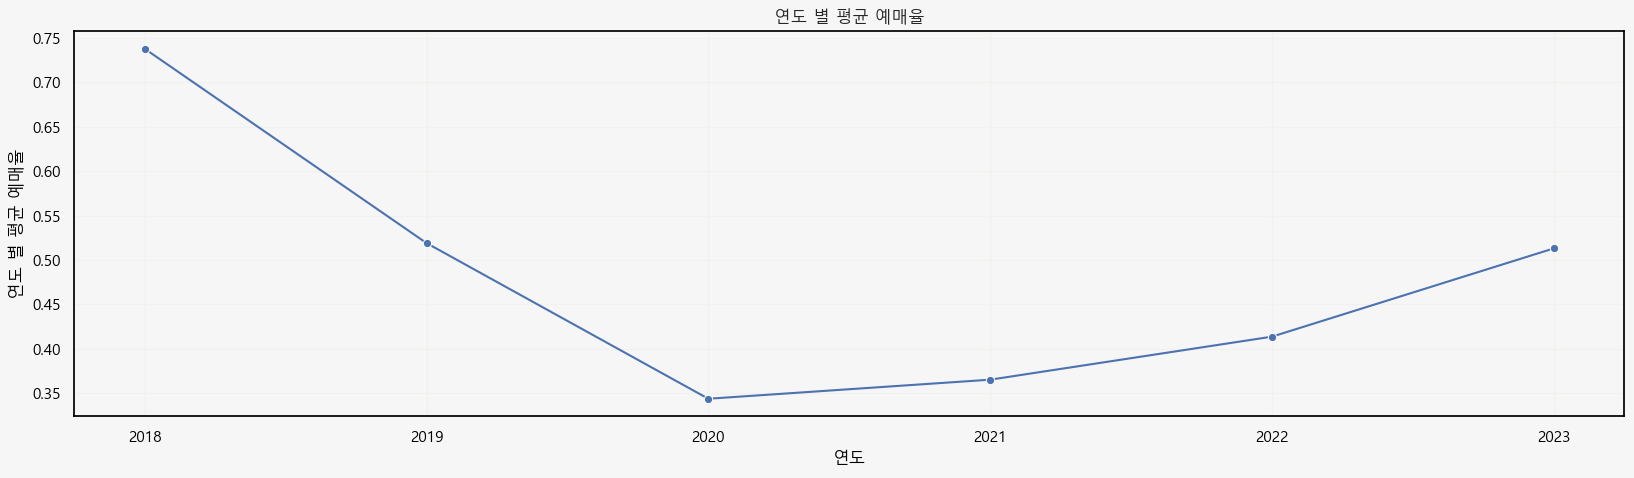

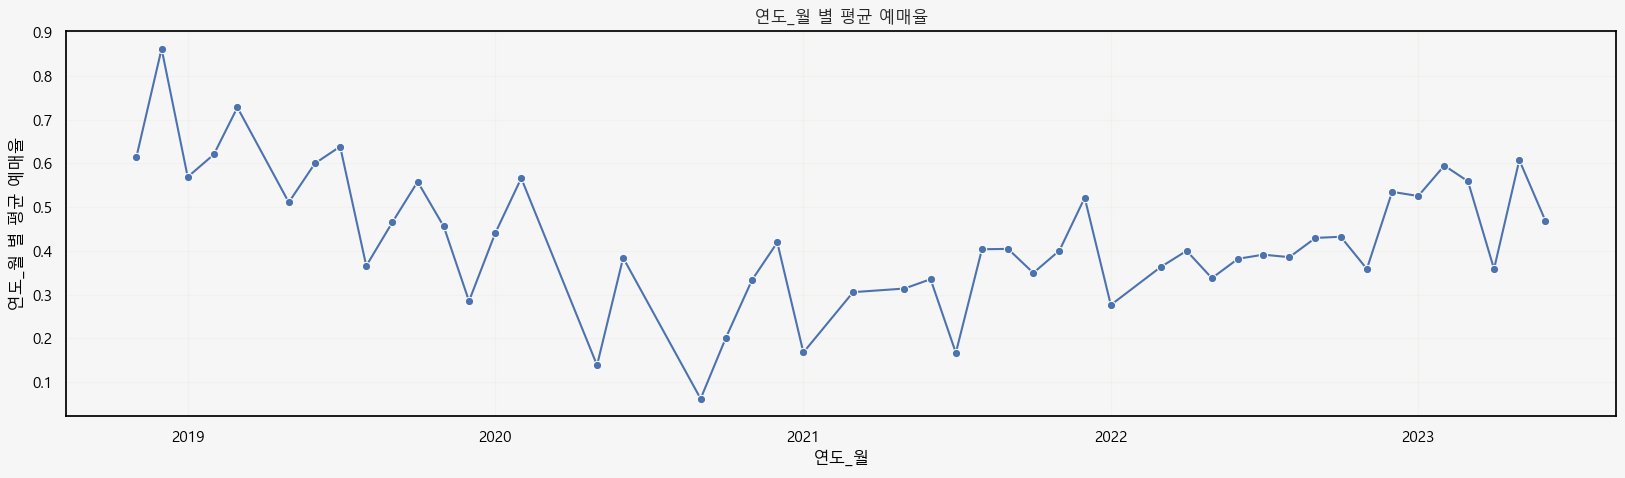

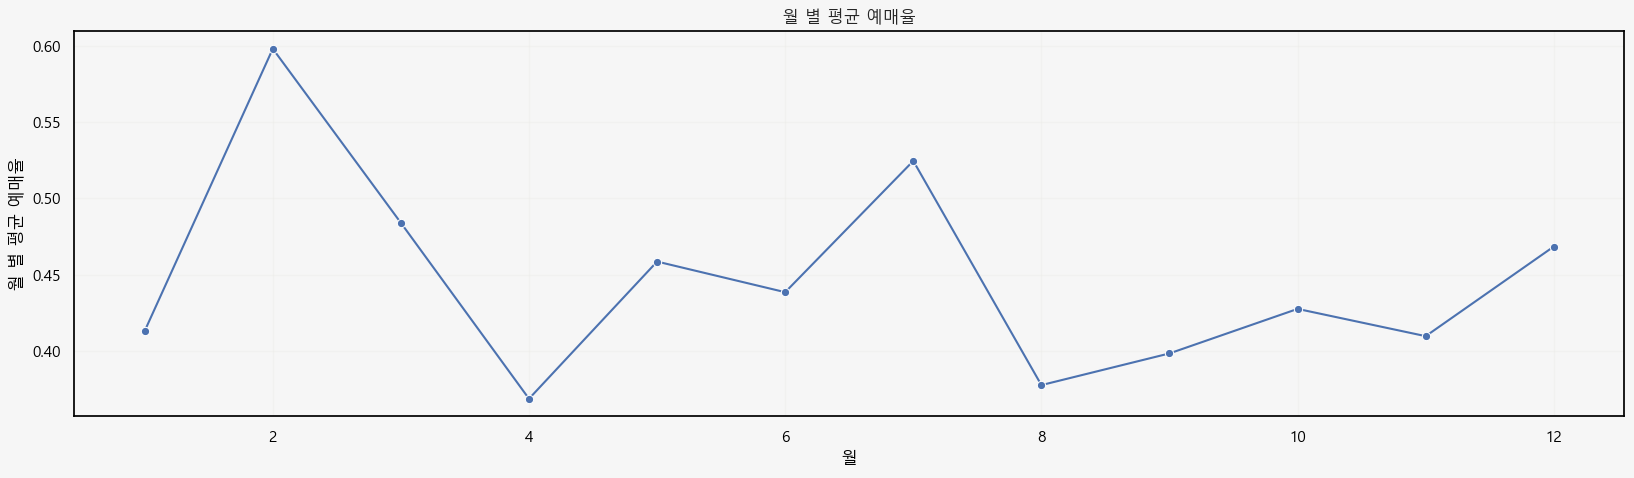

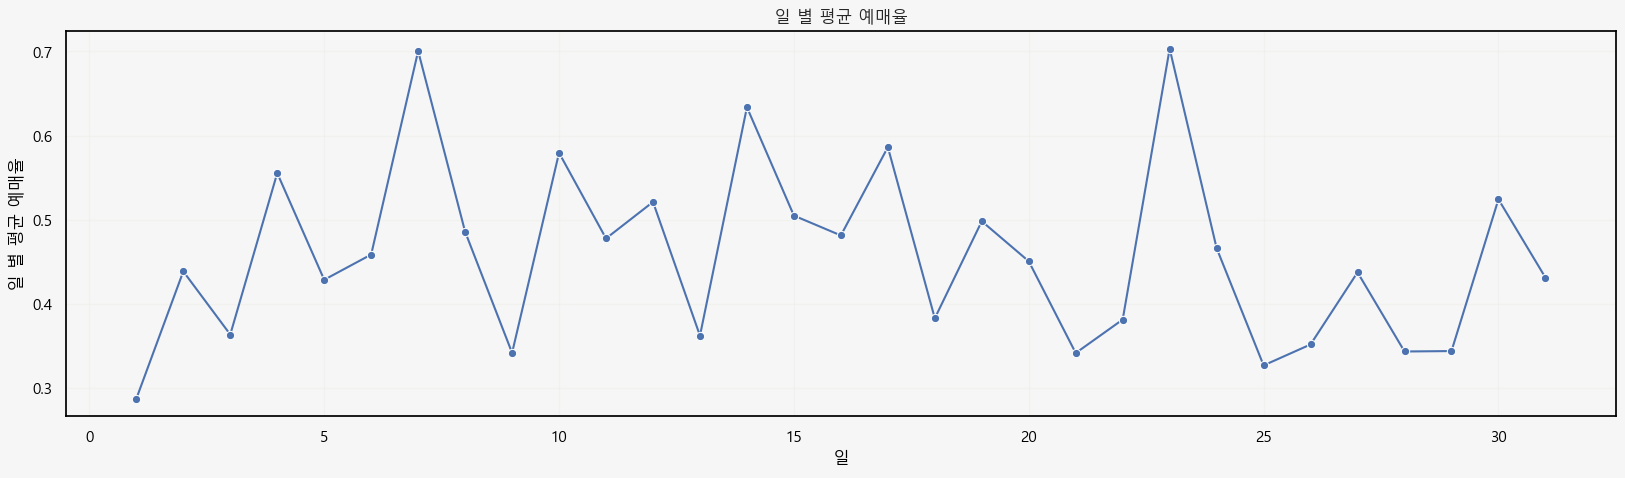

In [194]:
ex.simpleplot_purchase_plot()
ex.simpleplot_purchase_plot(keyword = '연도')
ex.simpleplot_purchase_plot(keyword = '연도_월')
ex.simpleplot_purchase_plot(keyword = '월')
ex.simpleplot_purchase_plot(keyword = '일')